In [1]:
import pandas as pd

In [37]:
sales_record=pd.read_csv(r'C:\Users\aswin\Downloads\sales_data.csv')

In [38]:
sales_record

,id,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,4,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,113032,12-04-2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,113033,02-04-2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,113034,02-04-2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,113035,04-03-2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [5]:
sales_record.info()#There is no Nan values. Hence, no removing of data is required
# However, Column "Month" has to be converted to date so as for easier analysis and sorting 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                113036 non-null  int64 
 1   Date              113036 non-null  object
 2   Day               113036 non-null  int64 
 3   Month             113036 non-null  object
 4   Year              113036 non-null  int64 
 5   Customer_Age      113036 non-null  int64 
 6   Age_Group         113036 non-null  object
 7   Customer_Gender   113036 non-null  object
 8   Country           113036 non-null  object
 9   State             113036 non-null  object
 10  Product_Category  113036 non-null  object
 11  Sub_Category      113036 non-null  object
 12  Product           113036 non-null  object
 13  Order_Quantity    113036 non-null  int64 
 14  Unit_Cost         113036 non-null  int64 
 15  Unit_Price        113036 non-null  int64 
 16  Profit            113036 non-null  int

In [6]:
sales_record.shape

(113036, 19)

In [7]:
#add in correct column
sales_record['Month'] = pd.DatetimeIndex(sales_record.Date).month

In [8]:
#export and save in jupyter
sales_record.to_csv('sales_record.csv', index=True)

In [40]:
# Data for total number of customer each month annually

Annual_month_sales=sales_record.sort_values(['Year'],ascending=True).groupby(['Year','Month']).id.count()
sales_record.sort_values(['Month'],ascending=True)
Annual_month_sales

Year  Month   
2011  April        207
      August       281
      December     330
      February     171
      January      188
                  ... 
2016  January     4210
      July        2067
      June        5082
      March       4366
      May         5015
Name: id, Length: 62, dtype: int64

In [50]:
#export to seaborn manually

Annual_month_sales.to_csv('Annual_month_sales.csv', index=True)

In [11]:
pd.unique(sales_record.Year)

array([2013, 2015, 2014, 2016, 2012, 2011], dtype=int64)

In [12]:
pd.unique(sales_record.Age_Group) #Just checking the age group available

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [13]:
pd.unique(sales_record.Product_Category) #checking the product type available for sale

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [35]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
Annual_profit=sales_record.groupby('Year')[['Profit']].sum()

Annual_profit

,Profit
Year,
2011,2881301
2012,2951993
2013,5959208
2014,5864087
2015,7528563
2016,7035948


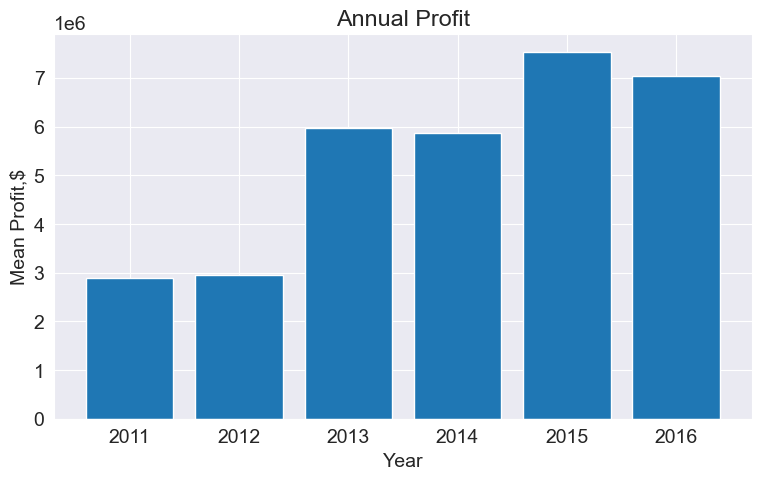

In [16]:
#computes annual sum profit 
Years=range(2011,2017)
Profit=Annual_profit.Profit
plt.title('Annual Profit')
plt.xlabel('Year')
plt.ylabel('Mean Profit,$')
plt.bar(Years,Profit);

In [17]:
Annual_cusotmer=sales_record.groupby('Year')[['id']].count()
Annual_cusotmer

,id
Year,
2011,2677
2012,2677
2013,24443
2014,29398
2015,24443
2016,29398


In [18]:
merged_profit_df = Annual_profit.merge(Annual_cusotmer, on="Year")
merged_profit_df 

,Profit,id
Year,,
2011,2881301,2677
2012,2951993,2677
2013,5959208,24443
2014,5864087,29398
2015,7528563,24443
2016,7035948,29398


In [60]:
merged_profit_df['Profit per 100 customer']=merged_profit_df.Profit*100/merged_profit_df.id

merged_profit_df 

,Profit,id,Profit per 100 customer
Year,,,
2011,2881301,2677,107631.714606
2012,2951993,2677,110272.431827
2013,5959208,24443,24380.018819
2014,5864087,29398,19947.231104
2015,7528563,24443,30800.486847
2016,7035948,29398,23933.424042


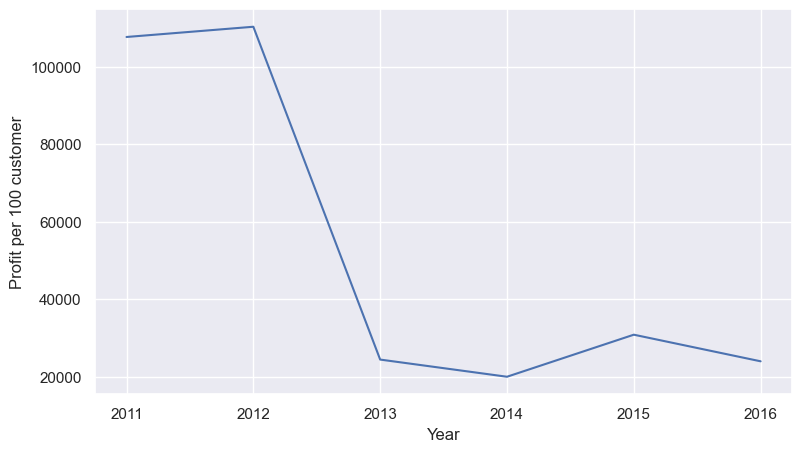

In [61]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Profit per 100 customer",
             data=merged_profit_df );

In [22]:
annual_quantity=sales_record.groupby('Year')[['Order_Quantity']].sum()
annual_quantity

,Order_Quantity
Year,
2011,5260
2012,5354
2013,294787
2014,379585
2015,289517
2016,370813


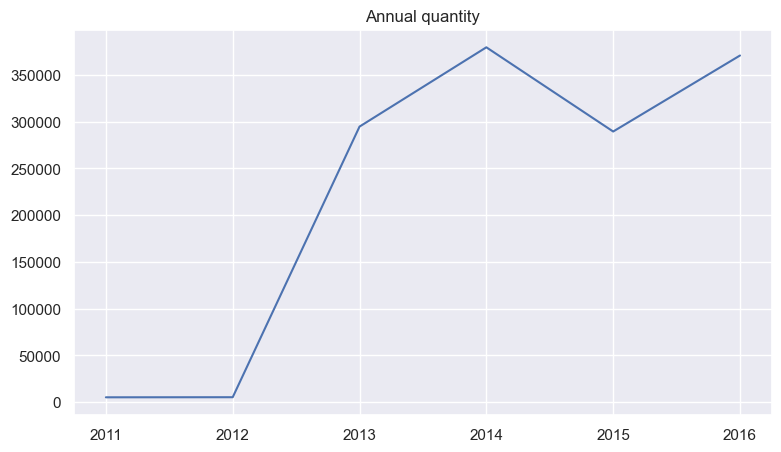

In [23]:
plt.plot(annual_quantity)
plt.title('Annual quantity');

In [24]:
Quantity_profit=annual_quantity.merge(Annual_profit, on="Year")
Quantity_profit

,Order_Quantity,Profit
Year,,
2011,5260,2881301
2012,5354,2951993
2013,294787,5959208
2014,379585,5864087
2015,289517,7528563
2016,370813,7035948


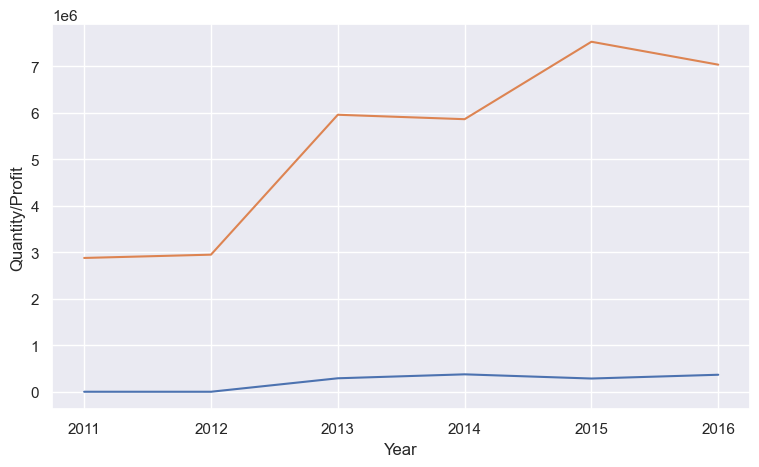

In [25]:
Quantity_profit.Order_Quantity.plot()
Quantity_profit.Profit.plot();

plt.xlabel("Year")
plt.ylabel("Quantity/Profit");

In [ ]:
Q1: What is the age group that contributes the highest profit to the shop?


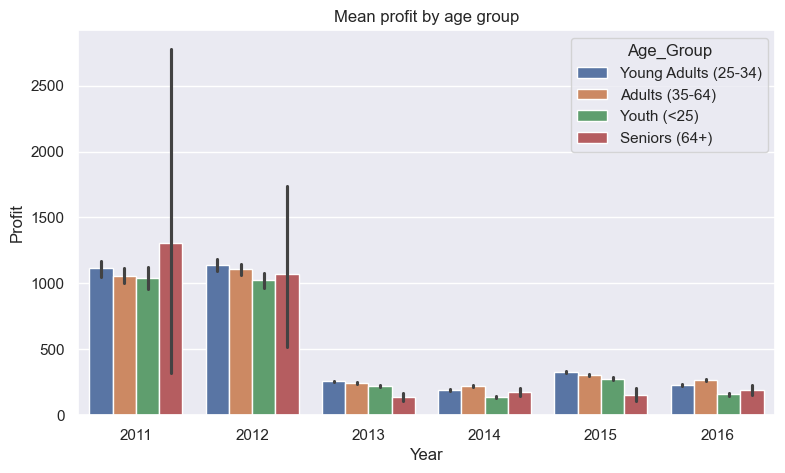

In [26]:
#computes annual mean profit by age group
plt.title('Mean profit by age group')
sns.barplot(x='Year', y='Profit', hue='Age_Group', data=sales_record);
#Take x as year and y as profit, with respect to age group for analysis

In [ ]:
Q2: Which product category is the best selling one?

In [44]:
pd.unique(sales_record.Product_Category)

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [45]:
best_selling_product=sales_record.groupby(['Year','Product_Category']).count()
best_selling_product

id   Date    Day  Month  Customer_Age  Age_Group  \
Year Product_Category                                                        
2011 Bikes              2677   2677   2677   2677          2677       2677   
2012 Bikes              2677   2677   2677   2677          2677       2677   
2013 Accessories       15025  15025  15025  15025         15025      15025   
     Bikes              5710   5710   5710   5710          5710       5710   
     Clothing           3708   3708   3708   3708          3708       3708   
2014 Accessories       20035  20035  20035  20035         20035      20035   
     Bikes              4604   4604   4604   4604          4604       4604   
     Clothing           4759   4759   4759   4759          4759       4759   
2015 Accessories       15025  15025  15025  15025         15025      15025   
     Bikes              5710   5710   5710   5710          5710       5710   
     Clothing           3708   3708   3708   3708          3708       3708   
2016 Accessories       20035  20035  20035  20035         20035      20035   
     Bikes              4604   4604   4604   4604          4604       4604   
     Clothing           4759   4759   4759   4759          4759       4759   

                       Customer_Gender  Country  State  Sub_Category  Product  \
Year Product_Category                                                           
2011 Bikes                        2677     2677   2677          2677     2677   
2012 Bikes                        2677     2677   2677          2677     2677   
2013 Accessories                 15025    15025  15025         15025    15025   
     Bikes                        5710     5710   5710          5710     5710   
     Clothing                     3708     3708   3708          3708     3708   
2014 Accessories                 20035    20035  20035         20035    20035   
     Bikes                        4604     4604   4604          4604     4604   
     Clothing                     4759     4759   4759          4759     4759   
2015 Accessories                 15025    15025  15025         15025    15025   
     Bikes                        5710     5710   5710          5710     5710   
     Clothing                     3708     3708   3708          3708     3708   
2016 Accessories                 20035    20035  20035         20035    20035   
     Bikes                        4604     4604   4604          4604     4604   
     Clothing                     4759     4759   4759          4759     4759   

                       Order_Quantity  Unit_Cost  Unit_Price  Profit   Cost  \
Year Product_Category                                                         
2011 Bikes                       2677       2677        2677    2677   2677   
2012 Bikes                       2677       2677        2677    2677   2677   
2013 Accessories                15025      15025       15025   15025  15025   
     Bikes                       5710       5710        5710    5710   5710   
     Clothing                    3708       3708        3708    3708   3708   
2014 Accessories                20035      20035       20035   20035  20035   
     Bikes                       4604       4604        4604    4604   4604   
     Clothing                    4759       4759        4759    4759   4759   
2015 Accessories                15025      15025       15025   15025  15025   
     Bikes                       5710       5710        5710    5710   5710   
     Clothing                    3708       3708        3708    3708   3708   
2016 Accessories                20035      20035       20035   20035  20035   
     Bikes                       4604       4604        4604    4604   4604   
     Clothing                    4759       4759        4759    4759   4759   

                       Revenue  
Year Product_Category           
2011 Bikes                2677  
2012 Bikes                2677  
2013 Accessories         15025  
     Bikes                5710  
     Clothing    

C:\Users\aswin\AppData\Local\Temp\ipykernel_27188\2639794833.py:1: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Year', y='id', hue='Product_Category', data=best_selling_product,shade=True, shade_lowest=False)
C:\Users\aswin\AppData\Local\Temp\ipykernel_27188\2639794833.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Year', y='id', hue='Product_Category', data=best_selling_product,shade=True, shade_lowest=False)


<Axes: xlabel='Year', ylabel='id'>

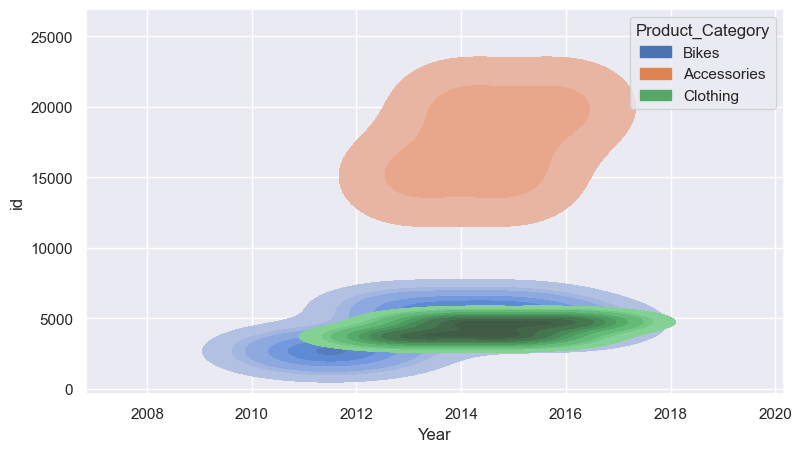

In [62]:
sns.kdeplot(x='Year', y='id', hue='Product_Category', data=best_selling_product,shade=True, shade_lowest=False)

In [46]:
# Compute the people from different age groups from 2011 to 2016
sales_record.groupby('Age_Group').id.count()

Age_Group
Adults (35-64)          55824
Seniors (64+)             730
Young Adults (25-34)    38654
Youth (<25)             17828
Name: id, dtype: int64

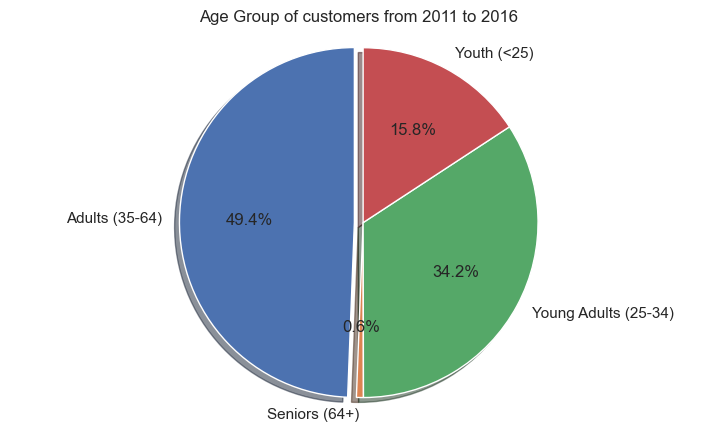

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.unique(sales_record.Age_Group)
sizes = list(sales_record.groupby('Age_Group').id.count())
explode = (0.05, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Adults')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Age Group of customers from 2011 to 2016')
plt.show()

In [48]:
# A simple code for calculating the gender of customers  

Male_customers=0
Female_customers=0
for Gender in list(sales_record.Customer_Gender):
    if "M" in Gender:
        Male_customers=Male_customers+1
    if "F" in Gender:
        Female_customers=Female_customers+1
    
    
print('Total Male customers:', Male_customers)
print('Total Female customers:', Female_customers)

Total Male customers: 58312
Total Female customers: 54724


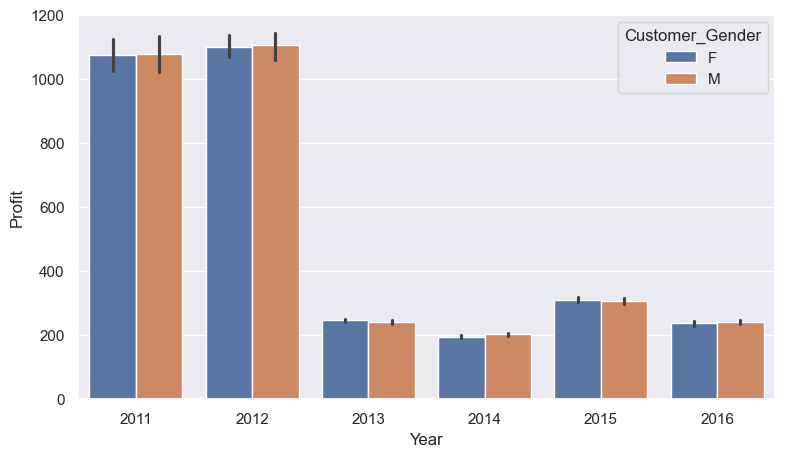

In [49]:
sns.barplot(x='Year', y='Profit', hue='Customer_Gender', data=sales_record);